In [1]:
import numpy as np
import pandas as pd


In [2]:
data=pd.read_csv("r_or_f.csv")

In [3]:
data.head()

,Unnamed: 0,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,0,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,REAL
1,1,16,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,120000-150000,Jungle Ventures is the leading Singapore based...,About Vault Dragon Vault Dragon is Dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,REAL
2,2,24,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",Businessfriend.com,100000-120000,"WDM Group is an innovative, forward thinking d...",#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,REAL
3,3,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,FAKE
4,4,103,Marketing Administrator,"GB, WAR, Coventry",Marketplace,15000-18000,Renewable Energy and Environmental Protection ...,The job is to support the growth of the #URL_9...,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,1,1,0,Full-time,Entry level,Bachelor's Degree,Internet,Marketing,REAL


In [4]:
data.shape

(1404, 19)

In [5]:
data.columns

Index(['Unnamed: 0', 'job_id', 'title', 'location', 'department',
       'salary_range', 'company_profile', 'description', 'requirements',
       'benefits', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent'],
      dtype='object')

In [6]:
data1=data.dropna()
data1.shape

(1404, 19)

In [7]:

print(data1.head())

   Unnamed: 0  job_id                                              title  \
0           0       7                              Head of Content (m/f)   
1           1      16                         VP of Sales - Vault Dragon   
2           2      24  Vice President, Sales and Sponsorship (Busines...   
3           3      99                                    IC&E Technician   
4           4     103                            Marketing Administrator   

            location          department   salary_range  \
0     DE, BE, Berlin          ANDROIDPIT    20000-28000   
1  SG, 01, Singapore               Sales  120000-150000   
2   US, CA, Carlsbad  Businessfriend.com  100000-120000   
3  US, , Stocton, CA        Oil & Energy   95000-115000   
4  GB, WAR, Coventry         Marketplace    15000-18000   

                                     company_profile  \
0  Founded in 2009, the Fonpit AG rose with its i...   
1  Jungle Ventures is the leading Singapore based...   
2  WDM Group is an i

In [8]:
data1.fraudulent.unique()

array(['REAL', 'FAKE'], dtype=object)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 1.0, 'Distribution of fraudulent')

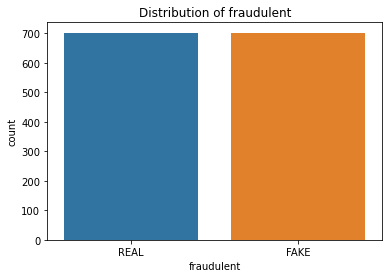

In [10]:
sns.countplot(x = "fraudulent", data=data1)
data1.loc[:, 'fraudulent'].value_counts()
plt.title('Distribution of fraudulent')

In [11]:
data1.fraudulent.value_counts()

REAL    702
FAKE    702
Name: fraudulent, dtype: int64

In [12]:
import re
import string
import nltk
from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer("english")


In [13]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["description"] = data["description"].apply(clean)

In [14]:
x = np.array(data1["description"])
y = np.array(data1["fraudulent"])

In [15]:
x

array(['Your Responsibilities:\xa0Manage the English-speaking editorial team and build a team of best-in-class editorsSet up content creation schedules and ensure deadlines are adhered toResearch and write about the latest tech topics and news in relation to the Android ecosystemEnsure that the content on the site is of a consistently high qualityBe the face and voice of #URL_874846adb69d98865d05ec57ce2425d9e363ef71e0c8436e59e86a136a508716#',
       "About Vault Dragon\xa0Vault Dragon is Dropbox for your physical stuff - a startup that is changing the aesthetic face of Singapore by creating more space in households and offices. We also save countless doctors, lawyers and professional services firms everyday from the catastrophe of document storage and management. Singapore Business Review magazine says we are one of the 20 hottest startups in Singapore. Don’t believe a word they are saying, because we are THE hottest startup in Singapore.Our crusade against the lack of space in Singapo

In [16]:
y

array(['REAL', 'REAL', 'REAL', ..., 'FAKE', 'FAKE', 'FAKE'], dtype=object)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [18]:
cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)


RandomForestClassifier()

In [20]:
pre=clf.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pre)*100)

99.35344827586206


In [28]:
input_word=input("ENTER THE SENTENCE:")

ENTER THE SENTENCE:Supermarket manager required At night . hurry up 


In [29]:
data = cv.transform([input_word]).toarray()
print(clf.predict(data))

['FAKE']
